# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$

## Imports

In [2]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib.plot_config import (FuncPlotType, DataPlotType, CumPlotType)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [22]:
σ = 1.0
nsample = 1000

def plot_labels_φ(φ):
    return [f"φ={val}" for val in φ]

def plot_labels_μ(μ):
    return [f"μ={val}" for val in μ]

def ar1_series_φ(φ_vals, μ):
    series = []
    for φ in φ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

def ar1_series_μ(φ, μ_vals):
    series = []
    for μ in μ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

## Simulation $\varphi$ Scan

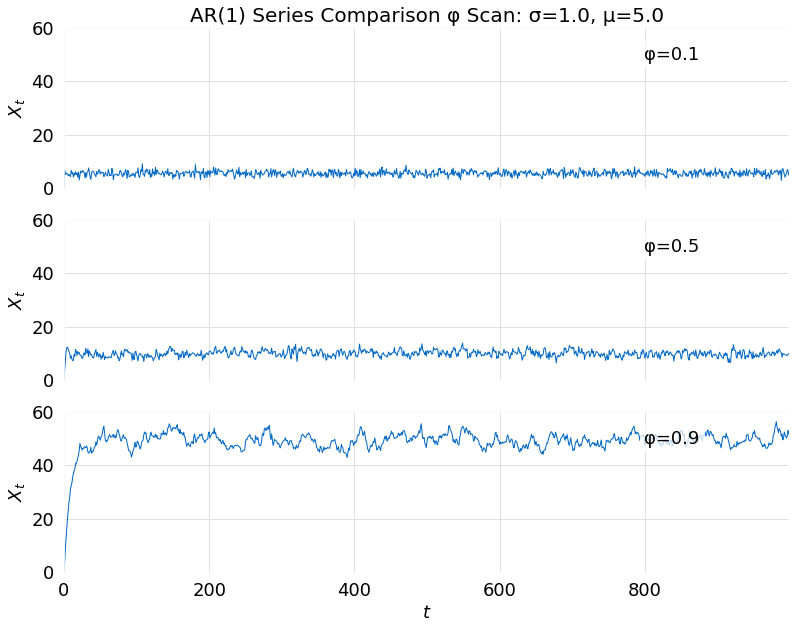

In [39]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, μ={μ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
plots.stack(series, ylim=[0.0, 60.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

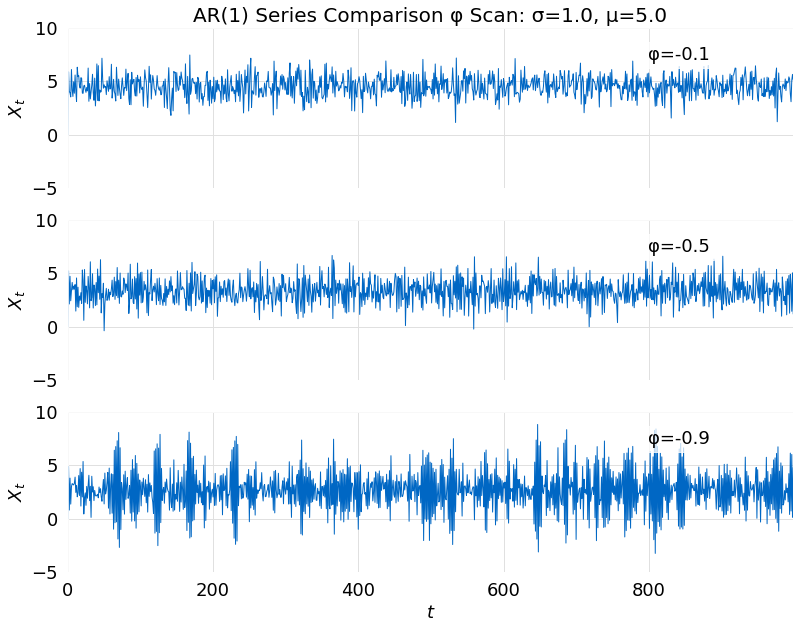

In [40]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, μ={μ}"
φ = numpy.array([-0.1, -0.5, -0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
plots.stack(series, ylim=[-5.0, 10.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\mu$ Scan

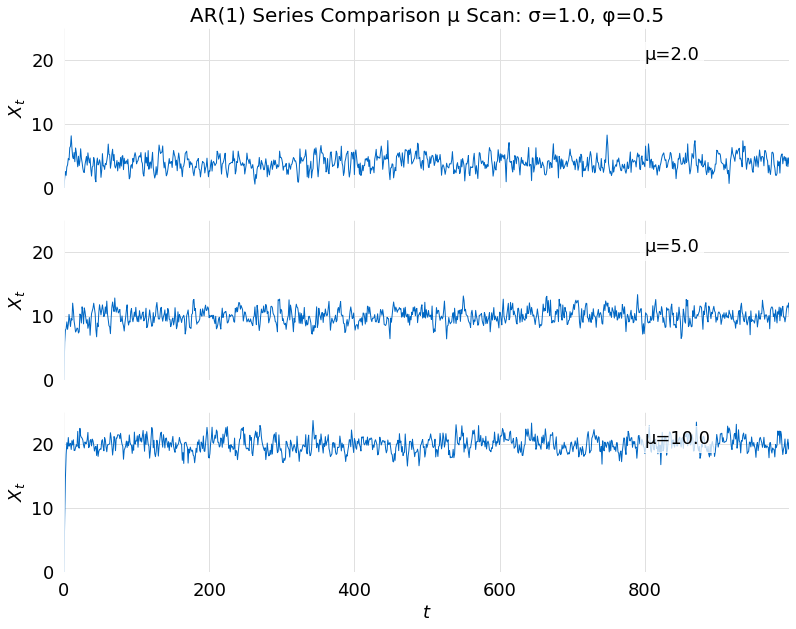

In [41]:
φ = 0.5
title = f"AR(1) Series Comparison μ Scan: σ={σ}, φ={φ}"
μ = numpy.array([2.0, 5.0, 10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
plots.stack(series, ylim=[0.0, 25.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

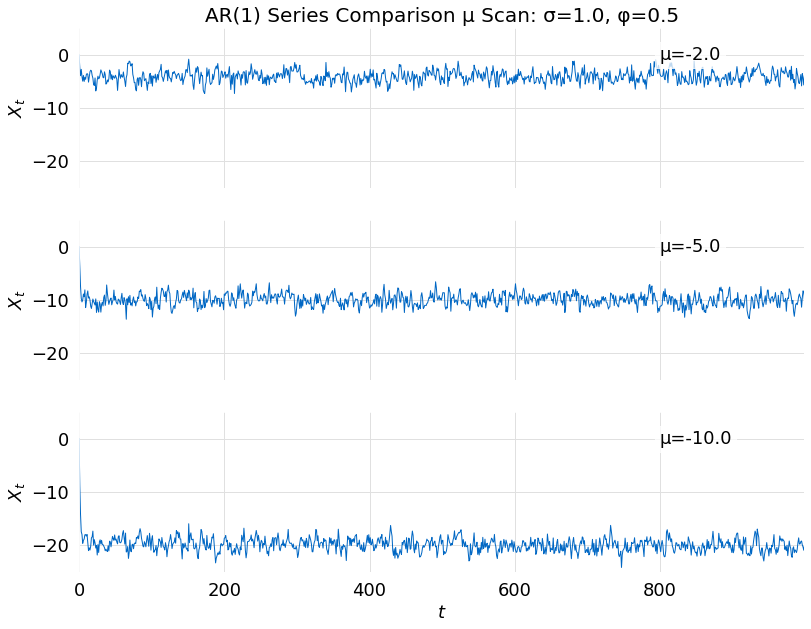

In [42]:
φ = 0.5
title = f"AR(1) Series Comparison μ Scan: σ={σ}, φ={φ}"
μ = numpy.array([-2.0, -5.0, -10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
plots.stack(series, ylim=[-25.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

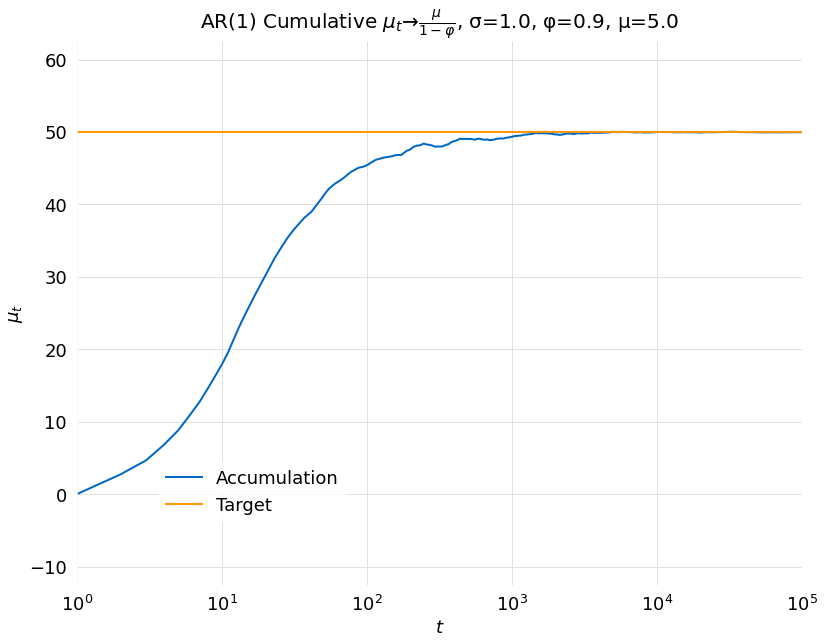

In [70]:
φ = 0.9
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

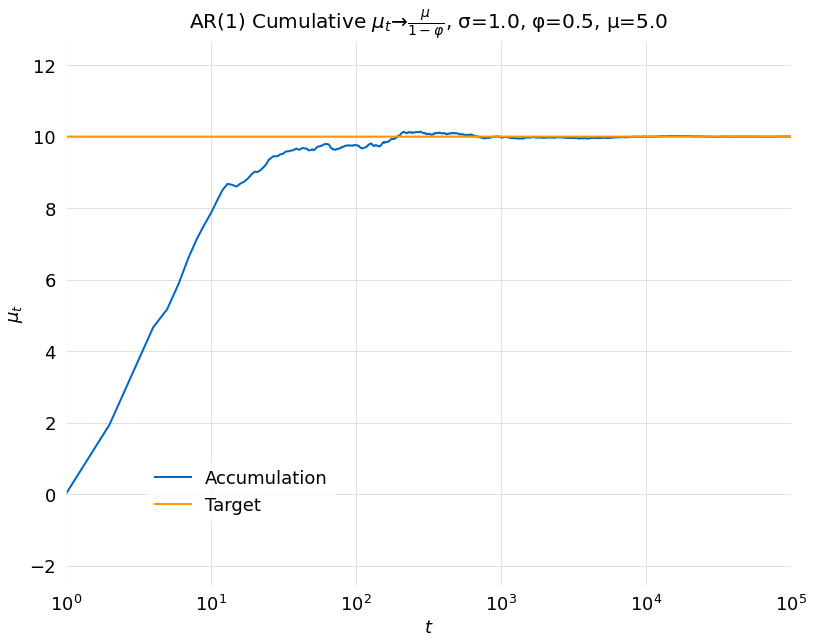

In [71]:
φ = 0.5
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

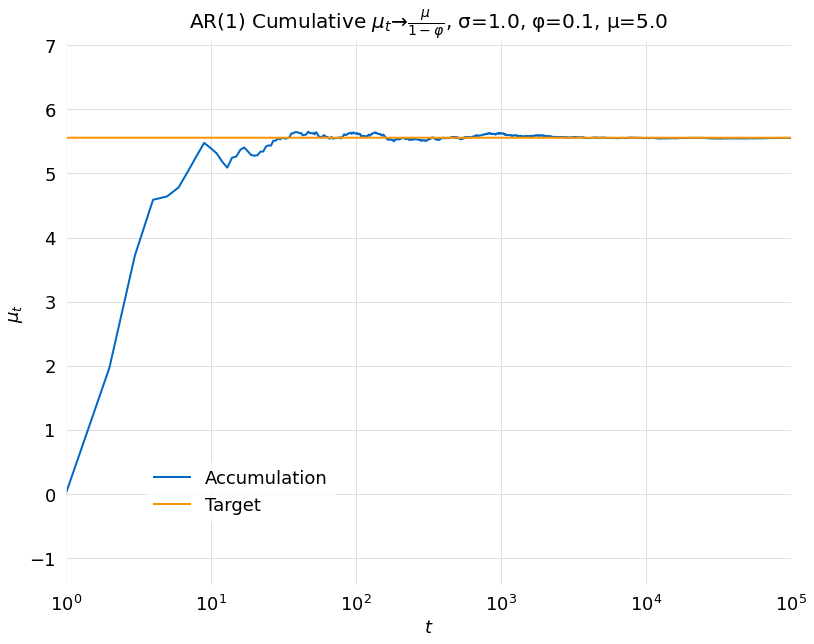

In [72]:
φ = 0.1
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

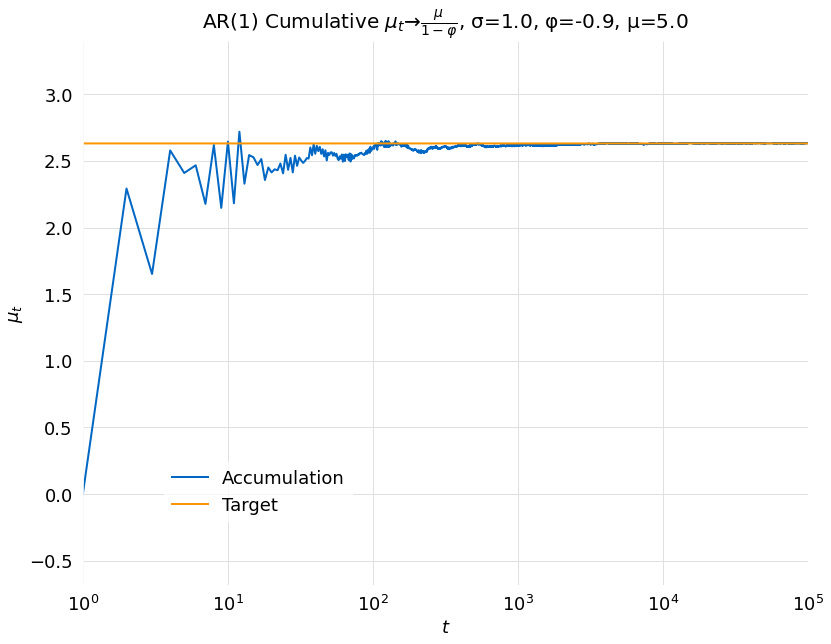

In [73]:
φ = -0.9
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

## Standard Deviation

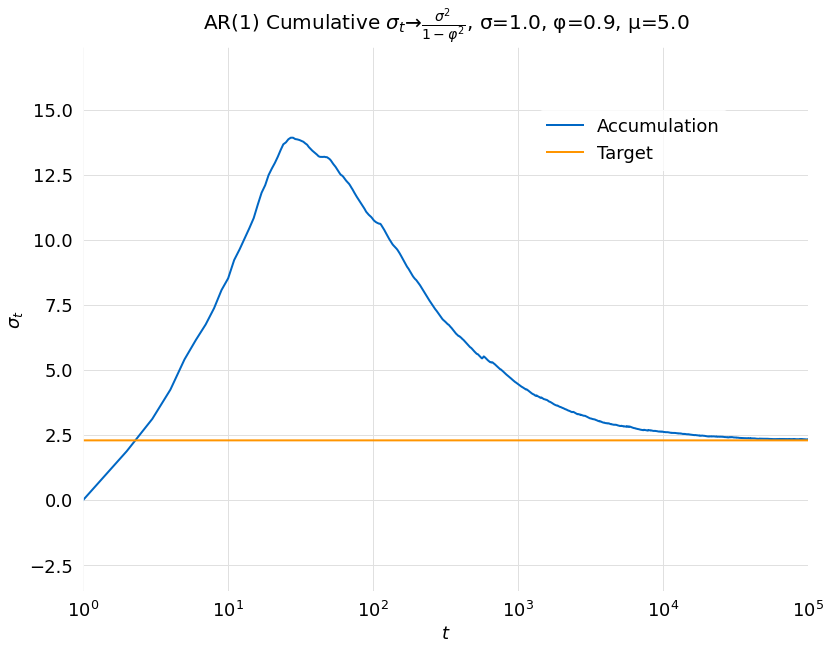

In [77]:
φ = 0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

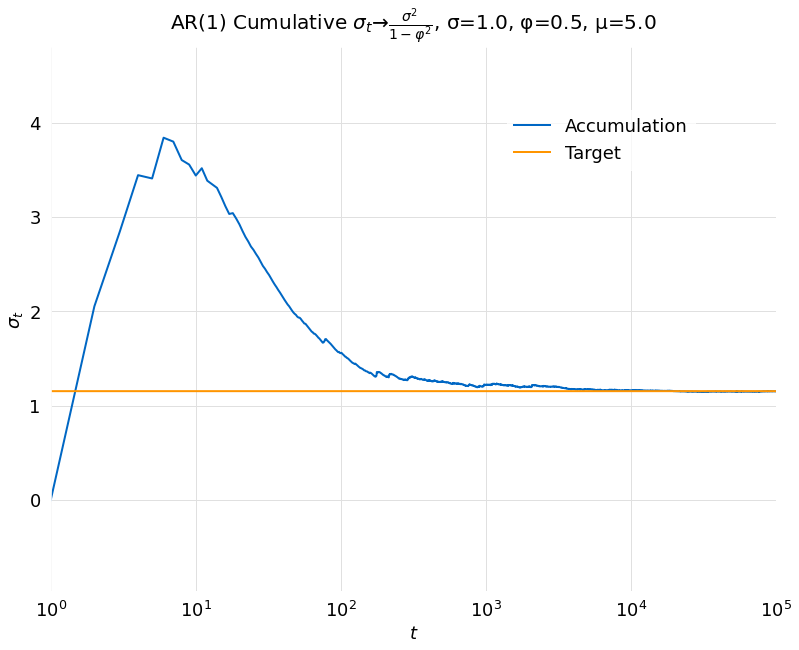

In [76]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

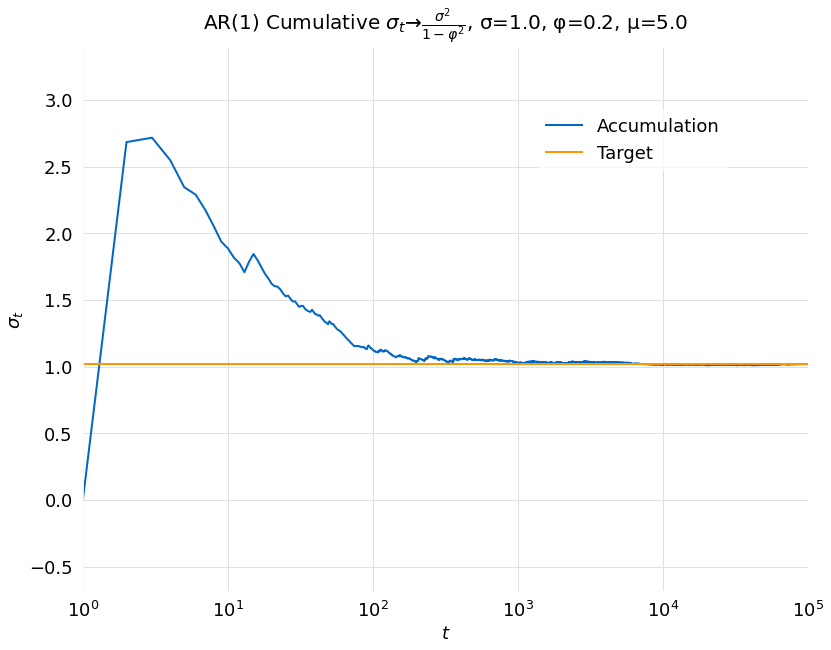

In [75]:
φ = 0.2
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
plots.cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

## Parameter Estimation

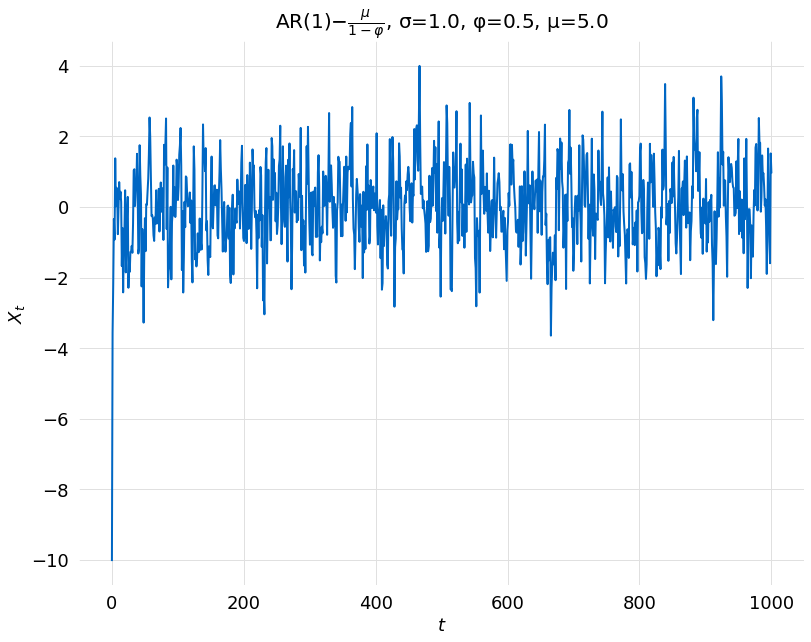

In [87]:
φ = 0.5
μ = 5.0
nsample = 1000
title = "AR(1)" + r"$- \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ) - arima.ar1_offset_mean(φ, μ)
plots.curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [89]:
results = arima.ar_estimate(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1456.357
Date:                Mon, 11 Apr 2022   AIC                           2918.714
Time:                        20:49:00   BIC                           2933.437
Sample:                             0   HQIC                          2924.310
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0215      0.064      0.337      0.736      -0.104       0.147
ar.L1          0.4814      0.025     19.133      0.000       0.432       0.531
sigma2         1.0774      0.038     28.672      0.000       1.004       1.151
===================================================================================
Ljung-Box (L1) (Q):                   2.43   Jarque-Bera (JB):              1001.79
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         7.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

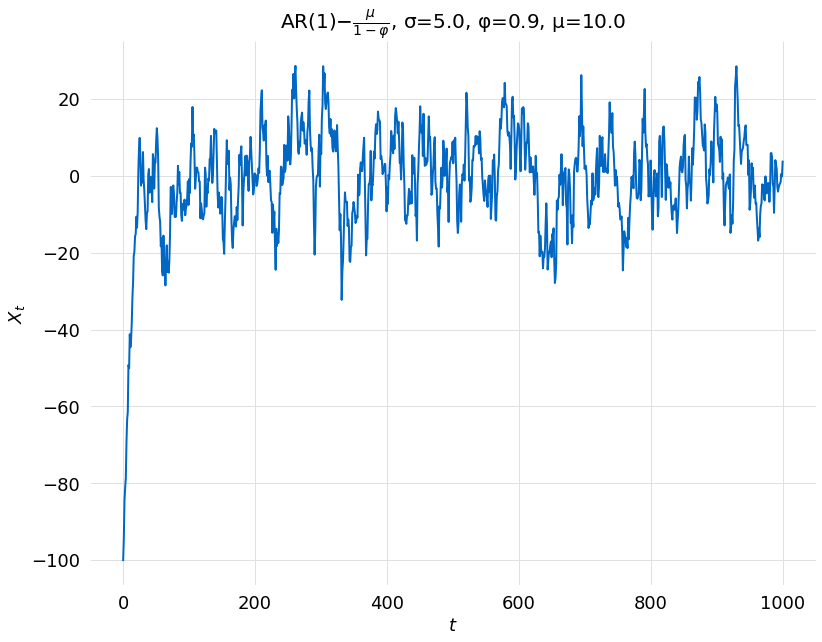

In [93]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = "AR(1)" + r"$- \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ) - arima.ar1_offset_mean(φ, μ)
plots.curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [94]:
results = arima.ar_estimate(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3063.488
Date:                Mon, 11 Apr 2022   AIC                           6132.977
Time:                        20:50:48   BIC                           6147.700
Sample:                             0   HQIC                          6138.572
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3006      2.904     -0.792      0.428      -7.993       3.391
ar.L1          0.9458      0.005    195.867      0.000       0.936       0.955
sigma2        26.7587      1.160     23.063      0.000      24.485      29.033
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                81.81
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.20
Prob(H) (two-sided):                  0.23   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

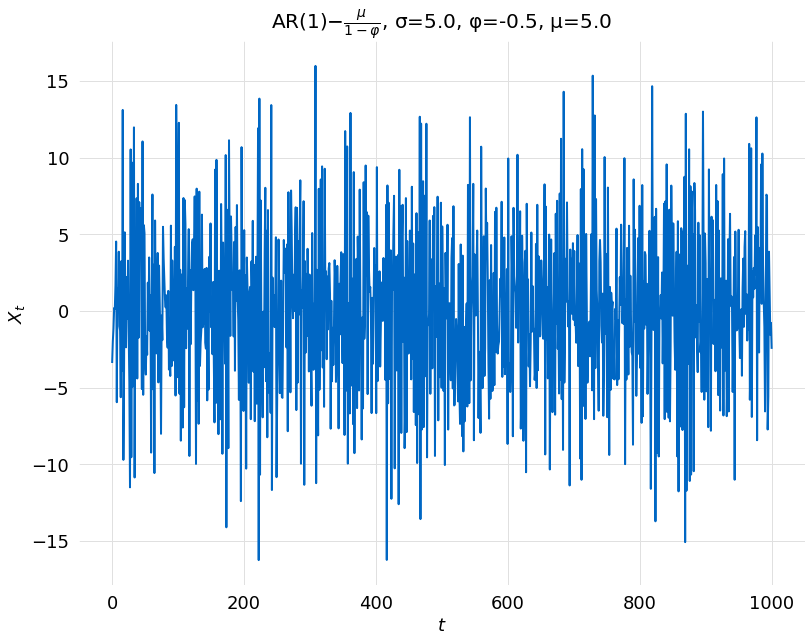

In [95]:
φ = -0.5
μ = 5.0
nsample = 1000
title = "AR(1)" + r"$- \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ) - arima.ar1_offset_mean(φ, μ)
plots.curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [96]:
results = arima.ar_estimate(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3001.830
Date:                Mon, 11 Apr 2022   AIC                           6009.661
Time:                        20:51:11   BIC                           6024.384
Sample:                             0   HQIC                          6015.257
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0540      0.106      0.508      0.612      -0.154       0.262
ar.L1         -0.4500      0.028    -16.016      0.000      -0.505      -0.395
sigma2        23.7020      1.104     21.464      0.000      21.538      25.866
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.67   Prob(JB):                         0.50
Heteroskedasticity (H):               1.00   Skew:                             0.05
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""